# Homwowrk5: Multiple Linear Regression

## 背景描述  
汽车发动机在测功机上产生的**制动马力**被认为是**发动机转速**(每分钟转数，rpm)、**燃料的道路辛烷值**和**发动机压缩值**的函数，我们在实验室里进行实验，研究它们的函数关系。

## 数据描述
| 变量名 | 变量含义 | 变量类型 | 变量取值范围 |
| :----------: | :--------: | :----------: | :----------: |
| （自变量）rpm | 发动机转速 | continuous variable | $\mathbb{R}^+$ |
| （自变量）Road_Octane_Number | 道路辛烷值 | continuous variable | $\mathbb{R}^+$ |
| （自变量）Compression | 压缩值 | continuous variable | $\mathbb{R}^+$ |
| （因变量）Brake_Horsepower | 制动马力 | continuous variable | $\mathbb{R}^+$ |

## 问题 
注：这里使用 $\alpha=0.05$ 的显著性水平

1. 请用统计模型描述制动马力和上述 3 个自变量之间的函数关系.
2. 请问Q1中所建立的模型是否合理.
3. 当发动机转速为3000转/min，道路辛烷值为90，发动机压缩值为100时，估计制动马力值的合理区间范围.

# Solution

In [2]:
# Import standard packages
import numpy as np
import pandas as pd
import math

In [3]:
# Import stats packages
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f
from scipy.stats import t

In [4]:
# alpha=0.05 3个因子 样本量n=12
alpha = 0.05
p = 3
n = 12

In [5]:
x = pd.read_csv('Project5.csv')
x.insert(0, 'intercept', np.ones(len(x))) 
data = x.values * 1
df = pd.DataFrame(data, columns = ['intercept', 'Factor1', 'Factor2', 'Factor3', 'BrakeHorsepower'])
print(df.head(10)) #check

   intercept  Factor1  Factor2  Factor3  BrakeHorsepower
0        1.0   2000.0     90.0    100.0            225.0
1        1.0   1800.0     94.0     95.0            212.0
2        1.0   2400.0     88.0    110.0            229.0
3        1.0   1900.0     91.0     96.0            222.0
4        1.0   1600.0     86.0    100.0            219.0
5        1.0   2500.0     96.0    110.0            278.0
6        1.0   3000.0     94.0     98.0            246.0
7        1.0   3200.0     90.0    100.0            237.0
8        1.0   2800.0     88.0    105.0            233.0
9        1.0   3400.0     86.0     97.0            224.0


### Solution For Q1:
列出线性模型为：$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \epsilon$

In [6]:
# Do the multiple linear regression
model = ols('BrakeHorsepower ~ Factor1 + Factor2 + Factor3', df).fit()
beta = model.params
print('Parameter Estimation: \n', round(beta, 5))
X = data[:, 0 : p + 1]
Y = data[:, -1]

Y_hat = model.fittedvalues
model.summary()
#print(model.summary())

Parameter Estimation: 
 Intercept   -266.03121
Factor1        0.01071
Factor2        3.13481
Factor3        1.86741
dtype: float64


/Users/sunqiushi/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        BrakeHorsepower   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Sat, 03 Apr 2021   Prob (F-statistic):            0.00317
Time:                        15:26:36   Log-Likelihood:                -40.708
No. Observations:                  12   AIC:                             89.42
Df Residuals:                       8   BIC:                             91.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -266.0312     92.674     -2.871      0.021    -479.737     -52.325
Factor1        0.0107      0.004      2.390      0.044       0.000       0.021
Factor2        3.1348      0.844      3.712      0.006       1.188       5.082
Factor3        1.8674      0.535      3.494      0.008       0.635       3.100
==============================================================================
Omnibus:                        0.392   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.230
Skew:                          -0.282   Prob(JB):                        0.891
Kurtosis:                       2.625   Cond. No.                     9.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
print(beta) #check paras

Intercept   -266.031212
Factor1        0.010713
Factor2        3.134806
Factor3        1.867409
dtype: float64


In [8]:
# linear regression
print('Y_hat = %.2f + (%.2f * Factor1) + (%.2f * Factor2) + (%.2f * Factor3)' % (beta[0], beta[1], beta[2], beta[3]))

Y_hat = -266.03 + (0.01 * Factor1) + (3.13 * Factor2) + (1.87 * Factor3)


In [9]:
# get mean value
X_mean = []
for k in range(p + 1):
    X_mean.append(np.mean(data[:, k]))  # x mean 
Y_mean = np.mean(data[:, -1])  # y mean

In [10]:
# centralization
X_cent = X - X_mean
Y_cent = Y - Y_mean

In [11]:
# get mean value
X_mean = []
for k in range(p + 1):
    X_mean.append(np.mean(data[:, k]))  # x mean 
Y_mean = np.mean(data[:, -1])  # y mean

# centralization
X_cent = X - X_mean
Y_cent = Y - Y_mean

print(X)

# Do the multiple linear regression
df = pd.DataFrame(X_cent, columns = ['intercept_cent','F1_cent', 'F2_cent', 'F3_cent'])

df['F_cent'] = Y_cent

[[1.00e+00 2.00e+03 9.00e+01 1.00e+02]
 [1.00e+00 1.80e+03 9.40e+01 9.50e+01]
 [1.00e+00 2.40e+03 8.80e+01 1.10e+02]
 [1.00e+00 1.90e+03 9.10e+01 9.60e+01]
 [1.00e+00 1.60e+03 8.60e+01 1.00e+02]
 [1.00e+00 2.50e+03 9.60e+01 1.10e+02]
 [1.00e+00 3.00e+03 9.40e+01 9.80e+01]
 [1.00e+00 3.20e+03 9.00e+01 1.00e+02]
 [1.00e+00 2.80e+03 8.80e+01 1.05e+02]
 [1.00e+00 3.40e+03 8.60e+01 9.70e+01]
 [1.00e+00 1.80e+03 9.00e+01 1.00e+02]
 [1.00e+00 2.50e+03 8.90e+01 1.04e+02]]


In [12]:
model_cent = ols('F_cent ~ F1_cent + F2_cent + F3_cent', df).fit()
beta_cent = model_cent.params
print('参数估计值: \n', round(beta_cent, 4))
Y_hat_cent = model_cent.fittedvalues
model_cent.summary()

参数估计值: 
 Intercept   -0.0000
F1_cent      0.0107
F2_cent      3.1348
F3_cent      1.8674
dtype: float64


/Users/sunqiushi/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 F_cent   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Sat, 03 Apr 2021   Prob (F-statistic):            0.00317
Time:                        15:26:50   Log-Likelihood:                -40.708
No. Observations:                  12   AIC:                             89.42
Df Residuals:                       8   BIC:                             91.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.776e-16      2.544  -1.09e-16      1.000      -5.866       5.866
F1_cent        0.0107      0.004      2.390      0.044       0.000       0.021
F2_cent        3.1348      0.844      3.712      0.006       1.188       5.082
F3_cent        1.8674      0.535      3.494      0.008       0.635       3.100
==============================================================================
Omnibus:                        0.392   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.230
Skew:                          -0.282   Prob(JB):                        0.891
Kurtosis:                       2.625   Cond. No.                         574.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# centralized linear regression
print('Y_hat_centralized = %.2f + (%.2f * X1_cent) + (%.2f * X2_cent) + (%.2f * X2_cent)' % (beta_cent[0], beta_cent[1], beta_cent[2], beta_cent[3]))

Y_hat_cent = -0.00 + (0.01 * X1_cent) + (3.13 * X2_cent) + (1.87 * X2_cent)


### Solution For Q2:

In [14]:
# 求解相关项
SSE = sum((Y - Y_hat) ** 2)
SST = sum((Y - Y_mean) ** 2)
SSR = sum((Y_hat - Y_mean) ** 2)

sigma2 = SSE / (n - p - 1)  # variance
sigma = np.sqrt(sigma2)  # standard

c = np.dot(X.T, X)
C = np.linalg.inv(c) 
# print(C)

**一元线性模型的显著性检验——F 检验:** 

以下分别为三个因素的检验

检验假设：$H_0: \beta_1=\beta_2=\beta_3=0$ vs $H_1: \exists \beta_i \neq 0,i=1,2$

In [15]:
# 计算F0
F0 = (SSR / p) / (SSE / (n - p - 1))
# F0 = model.fvalue
print('F0value: %.2f' % F0)
F = round(f.ppf(0.95, dfn = p, dfd = n - p - 1), 2)

F0value: 11.12


In [16]:
# 法1：
pVal1 = f.sf(F0, p, n - p - 1)
# pVal1 = model.f_pvalue
print('pVal1: %.2f' % pVal1)
if pVal1 < alpha:
    print('\nSince p-value < 0.05, reject H0.')
else:
    print('\nAccept H0.') 

pVal1: 0.00

Since p-value < 0.05, reject H0.


In [17]:
# 法2：
if F0 > F:
    print('Since F0 > F(0.95, 2, 19) = %.2f, reject H0.' % F)
else:
    print('Accept H0.') 

Since F0 > F(0.95, 2, 19) = 4.07, reject H0.


由 F 检验结果可知，该回归方程是显著的。

**一元线性模型的显著性检验——t 检验:**  
检验假设：$H_{0j}: \beta_j=0$ vs $H_{1j}: \beta_j \neq 0,j=1,2$

In [18]:
# t检验
t0 = []
for i in range(p + 1):   
    t0.append(beta[i] / (np.sqrt(C[i][i] * sigma2)))  # 求t值
# t0 = model.tvalues
print('t0值为：', np.round(t0, 4))
tVal = t.ppf(1 - alpha / 2, n - p - 1)
print('t的临界值为：%.4f' % tVal)
pVal2 = []
for i in range(p + 1):
    P = t.sf(abs(t0[i]), n - p - 1)
    pVal2.append(P)  # 已知临界值求p值
# pVal2 = model.pvalues / 2
print('P值为：', np.round(pVal2, 4))

t0值为： [-2.8706  2.3896  3.7123  3.4936]
t的临界值为：2.3060
P值为： [0.0104 0.0219 0.003  0.0041]


In [19]:
# 法1：
for i in range(p):
    if pVal2[i + 1] < alpha:
        print ('Since p%d-value < 0.05, reject H0%d.' % (i + 1, i + 1))
    else:
        print('Accept H0%d.' % (i + 1))
print('\n')   

Since p1-value < 0.05, reject H01.
Since p2-value < 0.05, reject H02.
Since p3-value < 0.05, reject H03.




In [20]:
#法2:
for i in range(p):
    if abs(t0[i + 1]) > tVal:
        print('Since t0%d > t(0.975, 19) = %.4f, reject H0%d' % (i + 1, tVal, i + 1))
    else:
        print('Accept H0%d.' % (i + 1)) 

Since t01 > t(0.975, 19) = 2.3060, reject H01
Since t02 > t(0.975, 19) = 2.3060, reject H02
Since t03 > t(0.975, 19) = 2.3060, reject H03


由上述 t 检验结果可知，各回归系数都是显著的。

**复相关系数（可决系数）的检验:**

定义样本决定系数为
$$
R^{2}=\frac{S S_{R}}{S S_{T}}=1-\frac{S S_{E}}{S S_{T}}
$$

调整可决系数：

$$R_{a}^{2}=1-\frac{n-1}{n-m-1}\left(1-R^{2}\right)$$

这个课上没有讲解，查询资料后得知主要是因为随着变量个数上升，$R^{2}$会增大而影响决定系数的准确度，所以引入惩罚项加以修正，称之 $adjusted R^{2}$

In [32]:
# 可决系数/决定系数
R2 = SSR / SST
print('可决系数R：%.4f' % R2)

# 调整可决系数
R2c = 1 - (SSE/(n-p-1)) / (SST/(n-1))
print('调整可决系数Ra：%.4f' % R2c)

可决系数R：0.8065
调整可决系数Ra：0.7340


综上所述，Q1中所建的多元线性回归模型是合理的。由于复相关系数（可决系数）值接近1，可以说明整体上 $X_1,X_2$,$X_3$ 与 $Y$ 呈线性关系。

**残差分析0: 计算Horsepower的残差**

In [22]:
# 计算期末成绩的残差
data_res = data * 1.0  # 乘1.0 不然会损失精度
for i in range(n):
    data_res[:, p + 1] = Y - Y_hat
df = pd.DataFrame(data_res, columns = ['intercept', 'P1', 'P2','P3','HorsePower_res'])
res = data_res[:, p + 1]
# res = model.resid
print(df.head())

   intercept      P1    P2     P3  HorsePower_res
0        1.0  2000.0  90.0  100.0        0.731289
1        1.0  1800.0  94.0   95.0      -13.328247
2        1.0  2400.0  88.0  110.0      -11.958476
3        1.0  1900.0  91.0   96.0        3.137442
4        1.0  1600.0  86.0  100.0       11.555798


**残差分析1: 残差的正态概率图**   
使用残差正态概率图可验证残差呈正态分布的假设。残差的正态概率图应该大致为一条直线。

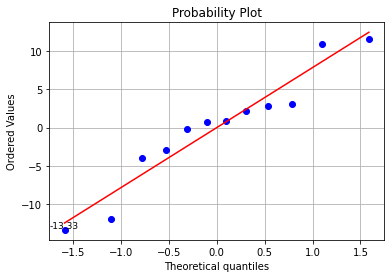

In [23]:
# 残差的正态概率图
osm, osr = stats.probplot(res, dist = 'norm', plot = plt)
x = osm[0][0]
y = osm[1][0]
plt.text(x, y, '%.2f' % float(y), ha='center', va= 'bottom', fontsize=9)
plt.grid()
plt.show()

In [24]:
# 异常值检验
MSE = SSE / (n - p - 1)
# MSE = model.mse_resid
d = np.abs(y) / np.sqrt(MSE)
if d < 3:
    print('残差', round(y, 2), '不是异常值.')
else:
    print('残差', round(y, 2), '是异常值')


残差 -13.33 不是异常值.


说明数据近似服从正态分布。

**残差分析2: 残差与拟合值的关系图**   
使用残差与拟合值图可验证“残差随机分布”和“具有常量方差”的假设。理想情况下，点应当在 0 的两端随机分布（模型的拟合点应该平均散布在被拟合值点附近），点中无可辨识的模式。  
下表中的模式可能表示该模型不满足模型假设: 

| 模式 | 模式的含义 |
| :----------: | :--------: |
| 残差相对拟合值呈扇形或不均匀分散 | 异方差 |
| 曲线 | 缺少高阶项 |
| 远离 0 的点 | 异常值 |
| 在 X 方向远离其他点的点 | 有影响的点|

Text(0, 0.5, 'e_i')

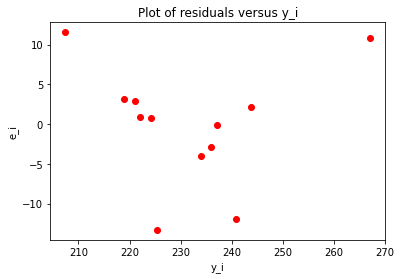

In [25]:
# 残差与拟合值的关系图
plt.scatter(Y_hat, res, c = 'red')
plt.title('Plot of residuals versus y_i')
plt.xlabel('y_i')
plt.ylabel('e_i')

我们并不能通过残差的分布来证明因变量的方差齐性，我们只是提出了“方差齐性”的假设，然后画出残差图，它杂乱无章，不相关，看起来是独立的，所以我们不能推翻这个假设，就认为观测值的方差是齐性的。

### Solution For Q3:

**关于 $E(y_0)$ 的估计:**

In [28]:
# 给定 x_0，求 E(y_0) 的估计值
def confidence_interval(x0):
    x0 = np.array(x0)
    Y0 = np.dot(x0.T, beta)
    delta0 = tVal * sigma * np.sqrt(x0.T @ C @ x0)
    Y0_int = [Y0 - delta0, Y0 + delta0]
    return Y0_int

x0 = [1]
for i in range(p):
    x0.append(int(input()))
print('Given x = ', x0, ', E(y_0) confidence interval：', np.round(confidence_interval(x0), 4))

 3000
 90
 100


Given x =  [1, 3000, 90, 100] , E(y_0) confidence interval： [226.2457 243.7181]


**关于 $y_0$ 的预测:**

In [33]:
# 给定 x_0，求 y_0 的预测区间
def confidence_interval(x0):
    x0 = np.array(x0)
    Y0 = np.dot(x0.T, beta)
    delta1 = tVal * sigma * np.sqrt(1 + x0.T @ C @ x0)
    Y0_int = [Y0 - delta1, Y0 + delta1]
    return Y0_int

x0_ = [1]
for i in range(p):
    x0_.append(int(input()))
print('Given x = ', x0_, ', y_0 estimation interval：', np.round(confidence_interval(x0_), 4))

# 注意预测区间和置信区间的计算方法差异，具体实现流程与上次实验类似

 3000
 90
 100


Given x =  [1, 3000, 90, 100] , y_0 estimation interval： [212.8622 257.1016]


**Remark1:** 由np.array()多维数组定义的矩阵，使用运算符“@”可以进行矩阵乘法。'*'运算符是将两个向量中每个元素进行相乘，是数乘运算，需要两个参与运算的矩阵维度相同。'np.dot()'和'@'运算符都可以起到矩阵乘法的作用，在处理连乘时‘@’相对方便。

**Remark2:**

在实验中用到了可决系数/决定系数的概念

多元线性回归问题中，我们定义样本决定系数为
$$
R^{2}=\frac{S S_{R}}{S S_{T}}=1-\frac{S S_{E}}{S S_{T}}
$$

$R^{2}$ 的取值在 [0,1] 区间内。

1. $R^{2}$ 越接近 $1,$ 表明回归拟合的效果越好。
2. $R^{2}$ 越接近 $0,$ 表明回归拟合的效果越差。

除此之外，还使用到了 调整可决系数(adjusted $R^{2}$)：

$$R_{a}^{2}=1-\frac{n-1}{n-m-1}\left(1-R^{2}\right)$$

修正$R^{2}$主要是因为随着变量个数上升，$R^{2}$会增大而影响决定系数的准确度，所以引入惩罚项加以修正

**Remark3**: 多元情况下依然有预测区间的长度大于置信区间，借机温习一下二者的计算方法

预测区间：

$$
(\hat{y}_{f}-t_{\alpha/2}*\sqrt{(1+\frac{1}{n}+\frac{x_{f}-\bar{x}}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}})\sigma^{2}},\hat{y}_{f}+t_{\alpha/2}*\sqrt{(1+\frac{1}{n}+\frac{x_{f}-\bar{x}}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}})\sigma^{2}}$$

置信区间：

$$
(\hat{y}_{f}-t_{\alpha/2}*\sqrt{(\frac{1}{n}+\frac{x_{f}-\bar{x}}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}})\sigma^{2}},\hat{y}_{f}+t_{\alpha/2}*\sqrt{(\frac{1}{n}+\frac{x_{f}-\bar{x}}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}})\sigma^{2}}$$

**总结:** 本次实验对Multiple Linear Regression有了更深入的理解，对调用相应统计模型和多元前提下的检验方法有了根号的掌握。对决定系数和调整决定系数adjusted $R^{2}$有了实践上直观的理解。同时，在多元前提下加深了对预测区间和置信区间的理解，体会了不同计算式导致的区间长度差异。

**End of Homework5**

**助教老师幸苦了～**